In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install nnunetv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 10.9 MB/s eta 0:00:00
  Created wheel for nnunetv2: filename=nnunetv2-2.6.

# The following block locates the nnUNet installation path for modifying source code parameters (e.g., epoch)

In [ ]:
import nnunetv2
import os

# 1. use nnunetv2 module's __file__ to find the dir
package_init_file = nnunetv2.__file__

# 2. get dir（ nnunetv2 root）
package_root_directory = os.path.dirname(package_init_file)

print("nnUNetV2 Root Directory:")
print(package_root_directory)

# 3. find Trainer Directory
trainer_path = os.path.join(package_root_directory, 'training', 'nnUNetTrainer')

print("\nnnUNetTrainer Directory:")
print(trainer_path)

nnUNetV2 Root Directory:
/usr/local/lib/python3.12/dist-packages/nnunetv2

nnUNetTrainer Directory:
/usr/local/lib/python3.12/dist-packages/nnunetv2/training/nnUNetTrainer


# The following block creates local paths to speed up processing and prevent cloud drive storage exhaustion

In [ ]:
# 1. # Set nnUNet_raw to point to the parent directory of your Drive data
%env nnUNet_raw=/content/drive/MyDrive/JHPIEGO/data

# 2. # Set nnUNet_preprocessed and nnUNet_results to local storage (faster speed)
%env nnUNet_preprocessed=/content/nnUNet_data/nnUNet_preprocessed
%env nnUNet_results=/content/nnUNet_data/nnUNet_results

env: nnUNet_raw=/content/drive/MyDrive/JHPIEGO/data
env: nnUNet_preprocessed=/content/nnUNet_data/nnUNet_preprocessed
env: nnUNet_results=/content/nnUNet_data/nnUNet_results


In [ ]:
# 1. Create nnUNet_preprocessed and nnUNet_results folders locally in Colab
!mkdir -p $nnUNet_preprocessed
!mkdir -p $nnUNet_results

# 2. Verify if the nnUNet_raw path correctly points to your Drive data
print("Verify nnUNet_raw:")
!ls $nnUNet_raw


Verify nnUNet_raw:
cervix				    prediction002_output_final_resized20
Dataset001_cervix		    prediction002_output_fold01234
Dataset002_Lesion		    prediction002_output_fold01234_2
Dataset003_scj			    prediction002_output_fold01234_new
final_segmentation_002		    prediction002_output_fold01234_new_2
final_segmentation_002_new	    prediction003_output_fold1
lesion				    prediction_output_fold2
prediction001_output_fold01234_new  scj
prediction001_output_fold3	    test
prediction002_output_final20


In [ ]:
# Verify successful installation
!nnUNetv2_train -h

usage: nnUNetv2_train [-h] [-tr TR] [-p P]
                      [-pretrained_weights PRETRAINED_WEIGHTS]
                      [-num_gpus NUM_GPUS] [--npz] [--c] [--val] [--val_best]
                      [--disable_checkpointing] [-device DEVICE]
                      dataset_name_or_id configuration fold

positional arguments:
  dataset_name_or_id    Dataset name or ID to train with
  configuration         Configuration that should be trained
  fold                  Fold of the 5-fold cross-validation. Should be an int
                        between 0 and 4.

options:
  -h, --help            show this help message and exit
  -tr TR                [OPTIONAL] Use this flag to specify a custom trainer.
                        Default: nnUNetTrainer
  -p P                  [OPTIONAL] Use this flag to specify a custom plans
                        identifier. Default: nnUNetPlans
  -pretrained_weights PRETRAINED_WEIGHTS
                        [OPTIONAL] path to nnU-Net checkpoint file 

In [ ]:
# Run planning and preprocessing
!nnUNetv2_plan_and_preprocess -d 1 2 3 --verify_dataset_integrity

Fingerprint extraction...
Dataset001_cervix
Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer
100% 301/301 [00:27<00:00, 10.75it/s]
Dataset002_Lesion
Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer
100% 154/154 [00:23<00:00,  6.56it/s]
Dataset003_scj
Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see 

Train

In [ ]:
# Train Dataset002 with the 2D configuration (Fold 3)
# can repeat this block and change the fold number or dataset number to train what you want
!nnUNetv2_train 002 2d 3

# This block attempts multi-GPU training (parallel execution failed); reuse the above single-GPU command and modify fold/dataset as needed

In [ ]:
#Using multiple GPUs for training
!CUDA_VISIBLE_DEVICES=0 nnUNetv2_train 002 2d 2 &
!CUDA_VISIBLE_DEVICES=1 nnUNetv2_train 002 2d 3 &


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-11-30 23:19:37.184702: Using torch.compile...
2025-11-30 23:19:38.738029: do_dummy_2d_data_aug: False
2025-11-30 23:19:38.738745: Creating new 5-fold cross-validation split...
2025-11-30 23:19:38.740732: Desired fold for training: 2
2025-11-30 23:19:38.740824: This split has 123 training an

save to google drive

In [ ]:
# # Copy Dataset002 results from local storage to Drive
!cp -r $nnUNet_results/Dataset002_Lesion /content/drive/MyDrive/JHPIEGO/nnUNet_Saved_Results_Backup/

postprocessing and predicting

In [ ]:
!nnUNetv2_find_best_configuration 002 -c 2d

This block configures the paths for the model and input data. You can adjust the paths based on your specific setup. Use this to select the model you want to use.

In [ ]:
%env nnUNet_raw=/content/drive/MyDrive/JHPIEGO/data
%env nnUNet_preprocessed=/content/nnUNet_data/nnUNet_preprocessed
%env nnUNet_results=/content/drive/MyDrive/JHPIEGO/nnUNet_Saved_Results_Backup

env: nnUNet_raw=/content/drive/MyDrive/JHPIEGO/data
env: nnUNet_preprocessed=/content/nnUNet_data/nnUNet_preprocessed
env: nnUNet_results=/content/drive/MyDrive/JHPIEGO/nnUNet_Saved_Results_Backup


In [ ]:
print("--- Step 2: prediction ---")
!nnUNetv2_predict -d 002 -c 2d \
    -i /content/drive/MyDrive/JHPIEGO/mytest/images/ \
    -o /content/drive/MyDrive/JHPIEGO/data/prediction002_output_final_resized20/ \
    -f 0 1 2 3 4

--- Step 2: prediction ---

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 20 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 20 cases that I would like to predict

Predicting Case-21_C21Aceto-1-_jpg:
perform_everything_on_device: True
100% 1/1 [00:01<00:00,  1.94s/it]
100% 1/1 [00:00<00:00, 26.04it/s]
100% 1/1 [00:00<00:00, 23.50it/s]
100% 1/1 [00:00<00:00, 24.71it/s]
100% 1/1 [00:00<00:00, 26.89it/s]
sending off prediction to background worker for resampling and export
done with Case-21_C21Aceto-1-_jpg

Predicting Case-21_C21Aceto-2-_jpg:
perform_everything_on_d

calculate Dice and IOU

In [ ]:
import torch
import numpy as np
from PIL import Image
import os


import os
import torch
import numpy as np
from PIL import Image

def load_and_preprocess_images(predict_dir, target_dir, size=(256, 256)):

    predict_files = sorted([f for f in os.listdir(predict_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
    target_files = sorted([f for f in os.listdir(target_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

    if len(predict_files) != len(target_files):
        print(f"Warning: Number of prediction files ({len(predict_files)}) does not match target files ({len(target_files)}).")

    predicts = []
    targets = []

    for pred_file, target_file in zip(predict_files, target_files):
        pred_path = os.path.join(predict_dir, pred_file)
        pred_img = Image.open(pred_path).convert('L')
        pred_array = np.array(pred_img.resize(size), dtype=np.float32)

        # normalize
        if pred_array.max() > 1.0:
            pred_array = pred_array / 255.0

        pred_array = np.clip(pred_array, 0, 1)


        target_path = os.path.join(target_dir, target_file)
        target_img = Image.open(target_path).convert('L')
        target_array = np.array(target_img.resize(size), dtype=np.float32)

        # normalize
        if target_array.max() > 1.0:
            target_array = target_array / 255.0

        target_array = np.clip(target_array, 0, 1)

        predicts.append(pred_array)
        targets.append(target_array)

    predicts_tensor = torch.from_numpy(np.array(predicts)).unsqueeze(1)
    targets_tensor = torch.from_numpy(np.array(targets)).unsqueeze(1)

    return predicts_tensor, targets_tensor


def compute_dice_iou_from_dirs(predict_dir, target_dir, threshold=0.5):
    """
    compute Dice and IoU scores from directories of images.
    """

    predicts, targets = load_and_preprocess_images(predict_dir, target_dir)


    pred = (predicts > threshold).float()

    eps = 1e-6
    intersect = (pred * targets).sum(dim=(1, 2, 3))
    union = (pred + targets - pred * targets).sum(dim=(1, 2, 3))

    dice = 2 * intersect / (pred.sum(dim=(1, 2, 3)) + targets.sum(dim=(1, 2, 3)) + eps)
    iou = intersect / (union + eps)

    return dice.mean().item(), iou.mean().item()



predict_dir = "/content/drive/MyDrive/JHPIEGO/data/prediction002_output_final_resized20/"
target_dir = "/content/drive/MyDrive/JHPIEGO/test/masks/lesion/"

dice_score, iou_score = compute_dice_iou_from_dirs(predict_dir, target_dir, threshold=0.5)

print(f"Dice Score: {dice_score:.4f}")
print(f"IoU Score: {iou_score:.4f}")



Dice Score: 0.4575
IoU Score: 0.3415


show the result

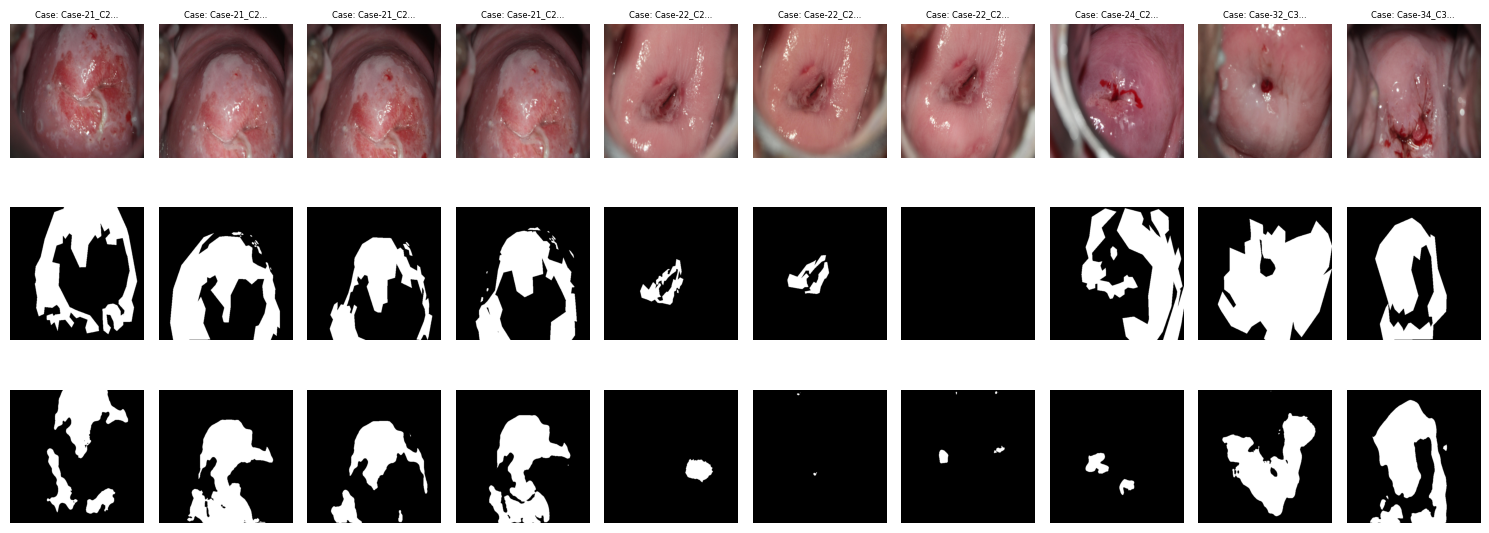

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- Define your directory paths ---
predict_dir = "/content/drive/MyDrive/JHPIEGO/data/prediction002_output_final_resized20/"
target_dir = "/content/drive/MyDrive/JHPIEGO/mytest/masks/lesion/"
rgb_dir = "/content/drive/MyDrive/JHPIEGO/mytest/rgbimages/"

# --- Parameter settings ---
NUM_CASES_TO_PLOT = 10
PLOT_SIZE = (15, 6) # Controls overall figure size

def plot_case_comparison(predict_dir, target_dir, rgb_dir, num_cases=10):
    """
    Load and display side-by-side: original RGB image, ground truth, and predicted segmentation.

    Uses Target directory filenames as reference, assuming Prediction filenames lack _0000.
    """

    # 1. Get file lists from all directories, using TARGET files as reference
    target_files = sorted([f for f in os.listdir(target_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

    if not target_files:
        print(f"Error: No image files found in ground truth directory '{target_dir}'.")
        return

    files_to_plot = target_files[:min(len(target_files), num_cases)]

    # 2. Create figure
    fig, axes = plt.subplots(3, len(files_to_plot), figsize=(PLOT_SIZE[0], PLOT_SIZE[1]))

    # Handle axes dimension issue for single file
    if len(files_to_plot) == 1:
        axes = np.array([axes]).T
    elif len(files_to_plot) > 1 and len(axes.shape) == 1:
        axes = np.expand_dims(axes, axis=0).T

    # Add labels on the left side
    row_labels = ['Original RGB', 'Ground Truth', 'Prediction']
    for row_idx, label in enumerate(row_labels):
        if len(files_to_plot) > 1:
            axes[row_idx, 0].set_ylabel(label, fontsize=8, rotation=90, labelpad=20)
        else:
            axes[row_idx, 0].set_ylabel(label, fontsize=8, rotation=90, labelpad=20)

    for i, target_filename in enumerate(files_to_plot):
        # Assume target_filename is 'case_001_0000.png'

        case_id = target_filename.rsplit('.', 1)[0] # 'case_001_0000'
        ext = target_filename.rsplit('.', 1)[1]     # 'png'

        # Ground truth / RGB file paths (assume same filename as Target)
        target_path = os.path.join(target_dir, target_filename)
        rgb_path = os.path.join(rgb_dir, target_filename) # Assume RGB filename also has _0000

        # Prediction result filename: remove "_0000" suffix
        if case_id.endswith('_0000'):
            # case_001_0000 -> case_001
            pred_case_id = case_id[:-5]
        else:
            # If ground truth filename doesn't have _0000, use as is
            pred_case_id = case_id

        pred_filename = f"{pred_case_id}.{ext}" # e.g., 'case_001.png'
        pred_path = os.path.join(predict_dir, pred_filename)

        # 5. Load images
        try:
            # Check if all paths exist
            if not os.path.exists(pred_path):
                 print(f"Warning: Prediction file {pred_path} not found. Skipping this case.")
                 continue
            if not os.path.exists(rgb_path):
                 print(f"Warning: RGB file {rgb_path} not found. Skipping this case.")
                 continue

            # Load original RGB image
            img_rgb = Image.open(rgb_path).convert('RGB')
            # Load ground truth (grayscale)
            img_target = Image.open(target_path).convert('L')
            # Load prediction result (grayscale)
            img_predict = Image.open(pred_path).convert('L')

        except Exception as e:
            print(f"Warning: Error loading file {target_filename}: {e}. Skipping this case.")
            continue

        # 6. Plotting

        # Row 1: Original RGB
        axes[0, i].imshow(img_rgb)
        axes[0, i].set_title(f"Case: {pred_case_id[:10]}...", fontsize=6)

        # Row 2: Ground Truth
        axes[1, i].imshow(img_target, cmap='gray')

        # Row 3: Prediction Result
        axes[2, i].imshow(img_predict, cmap='gray')

        # Clear axis
        for row in range(3):
            axes[row, i].axis('off')

    plt.tight_layout()
    plt.show()

# --- Execute function ---
plot_case_comparison(predict_dir, target_dir, rgb_dir, NUM_CASES_TO_PLOT)